# Carlos Sainz
<img src="https://www.formula1.com/content/fom-website/en/drivers/carlos-sainz/_jcr_content/image.img.1920.medium.jpg/1646818866749.jpg" width="300">

### Team: Ferrari

<img src ="https://www.formula1.com/content/fom-website/en/drivers/charles-leclerc/_jcr_content/helmet.img.png/1646824728203.png" width="200">


In [2]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [3]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [4]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

sai_laps <- lap_data %>%
            filter(driverId == 832)

# Season Analysis

In [52]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


raceId,n
<dbl>,<int>
1045,57
990,56
1052,56
1011,53
929,29
949,29
971,12


`geom_smooth()` using formula 'y ~ x'



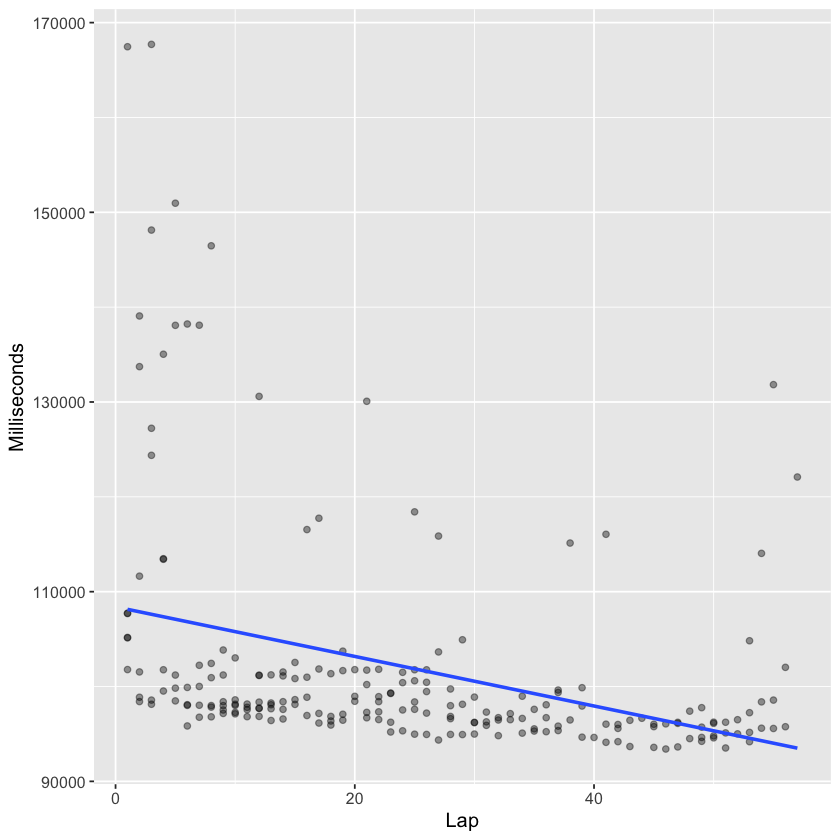

In [53]:
set.seed(2022)

#1.  BAHRAIN 

cs_bahrain <- sai_laps %>%
                filter(raceId %in% bahrain_race_ID) 

cs_bahrain_clean <- cs_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
cs_bahrain_clean
cs_bahrain_clean_ID <- cs_bahrain_clean %>%
                        pull(raceId) 


### SPLITTING DATA

cs_bahrain_races <- sai_laps %>%
                    filter(raceId %in% cs_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse()

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1054,66
1042,65


`geom_smooth()` using formula 'y ~ x'



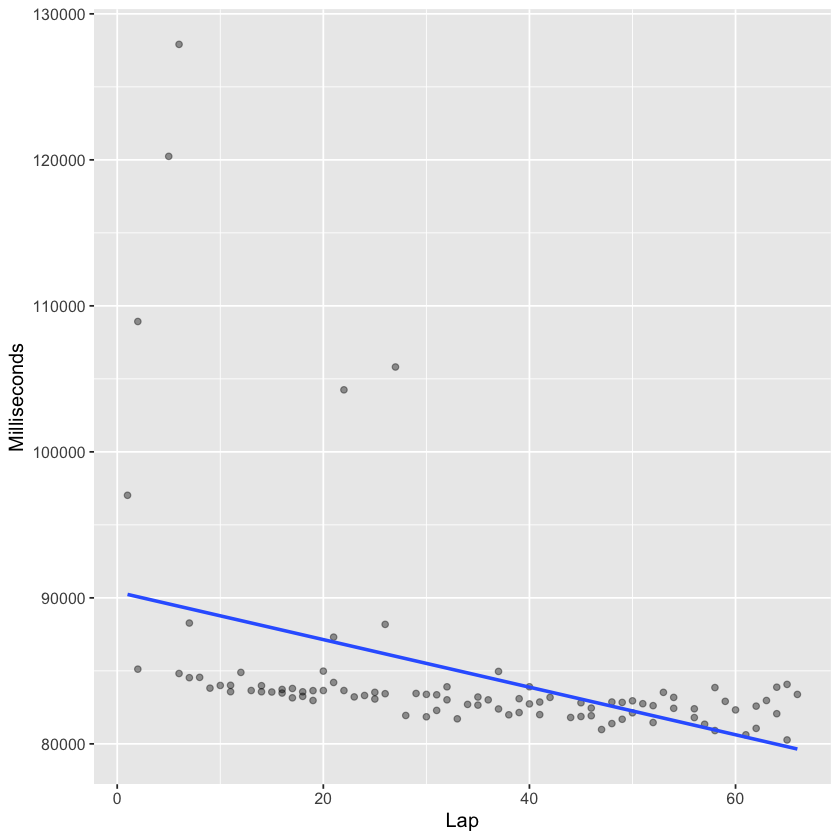

In [54]:
set.seed(2022)

#2. Portimão 

cs_Portimão <- sai_laps %>%
                filter(raceId %in% Portimão_race_ID) 

cs_Portimão_csean <- cs_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_Portimão_csean
cs_Portimão_csean_ID <- cs_Portimão_csean %>%
                        pull(raceId)


### SPLITTING DATA

cs_Portimão_races <- sai_laps %>%
                    filter(raceId %in% cs_Portimão_csean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(cs_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse()

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
989,58
926,57
948,57
969,56
1010,9


`geom_smooth()` using formula 'y ~ x'



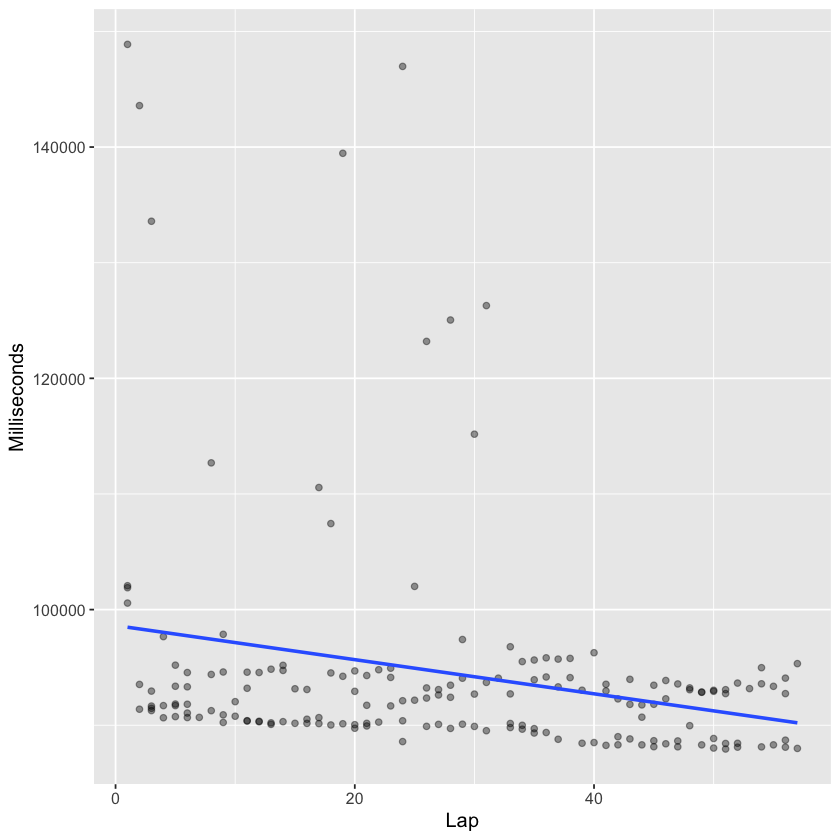

In [55]:
set.seed(2022)

#3. Australia

cs_aus <- sai_laps %>%
                filter(raceId %in% aus_race_ID) 

cs_aus_clean <- cs_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_aus_clean
cs_aus_clean_ID <- cs_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_aus_races <- sai_laps %>%
                    filter(raceId %in% cs_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse()

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



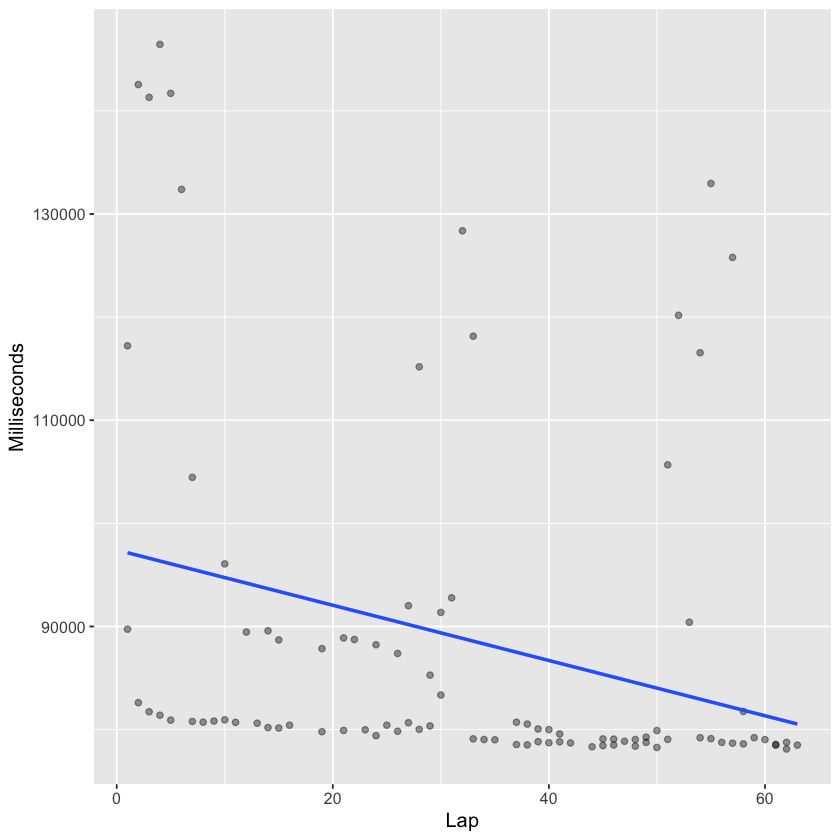

In [56]:
set.seed(2022)

#4. Italy, Imola

cs_imola <- sai_laps %>%
                filter(raceId %in% imola_race_ID) 

cs_imola_clean <- cs_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_imola_clean
cs_imola_clean_ID <- cs_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_imola_races <- sai_laps %>%
                    filter(raceId %in% cs_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse()

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



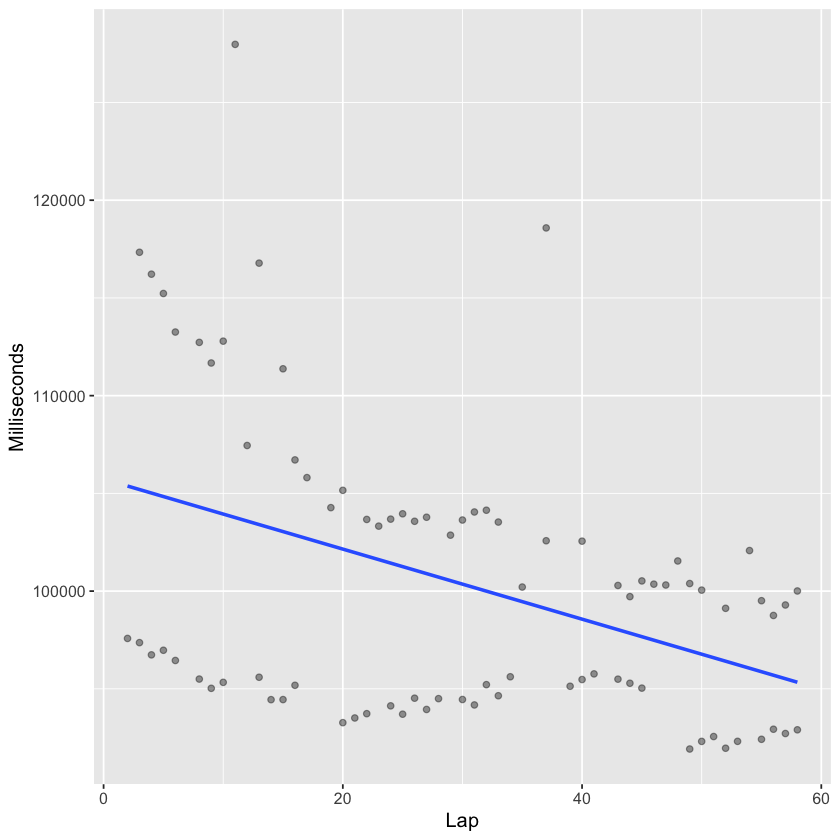

In [57]:
set.seed(2022)

#5. Turkey (Replacing Miami)

cs_turkey <- sai_laps %>%
                filter(raceId %in% turkey_race_ID) 

cs_turkey_clean <- cs_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_turkey_clean
cs_turkey_clean_ID <- cs_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_turkey_races <- sai_laps %>%
                    filter(raceId %in% cs_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse()

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
952,66
1014,66
1055,66
930,65
973,65
993,65
1036,65


`geom_smooth()` using formula 'y ~ x'



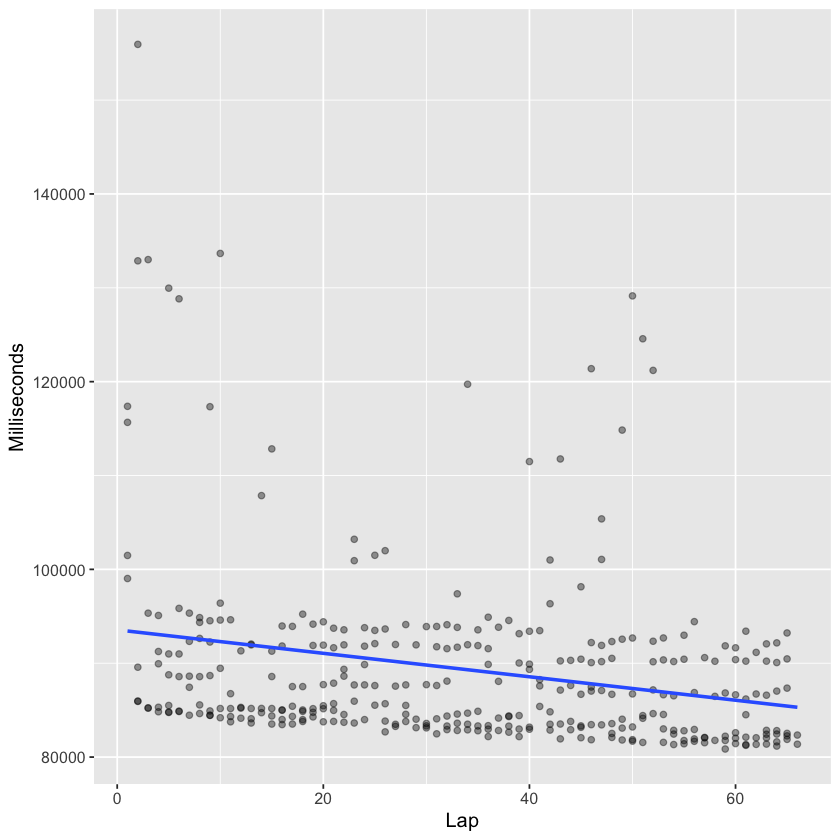

In [58]:
set.seed(2022)

#6. Spain

cs_spain <- sai_laps %>%
                filter(raceId %in% spain_race_ID) 

cs_spain_clean <- cs_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_spain_clean
cs_spain_clean_ID <- cs_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_spain_races <- sai_laps %>%
                    filter(raceId %in% cs_spain_clean_ID)

formulaone_split <- initial_split(cs_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse()

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
931,78
974,78
994,78
1015,78
1056,78
953,77


`geom_smooth()` using formula 'y ~ x'



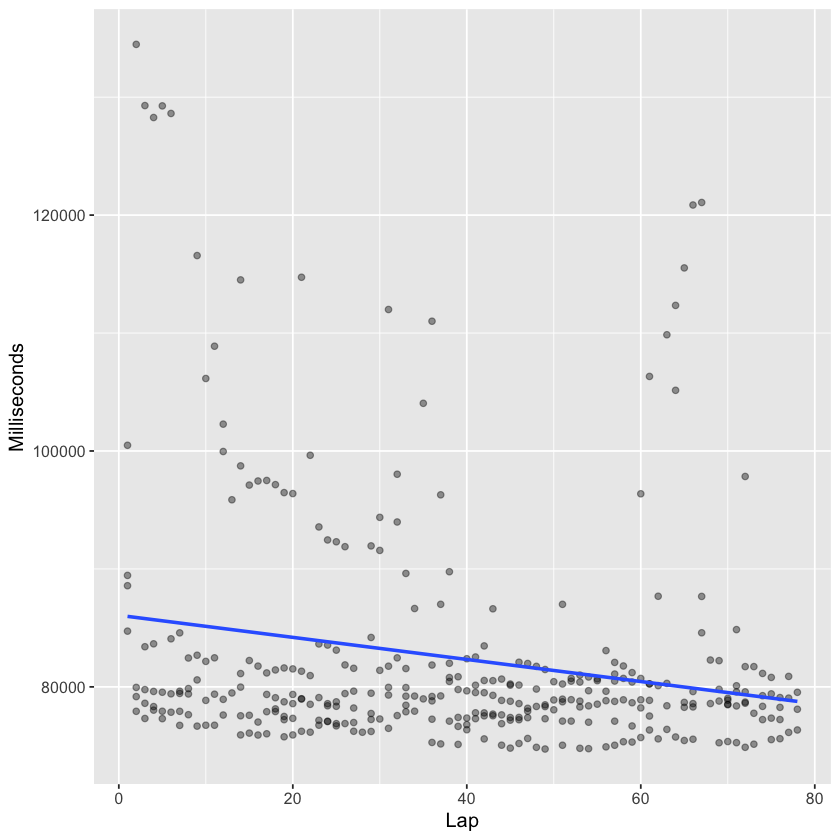

In [59]:
set.seed(2022)

#7. Monaco

cs_monaco <- sai_laps %>%
                filter(raceId %in% monaco_race_ID) 

cs_monaco_clean <- cs_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_monaco_clean
cs_monaco_clean_ID <- cs_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_monaco_races <- sai_laps %>%
                    filter(raceId %in% cs_monaco_clean_ID)

formulaone_split <- initial_split(cs_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse()

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
976,51
992,51
1013,51
1057,51
955,31


`geom_smooth()` using formula 'y ~ x'



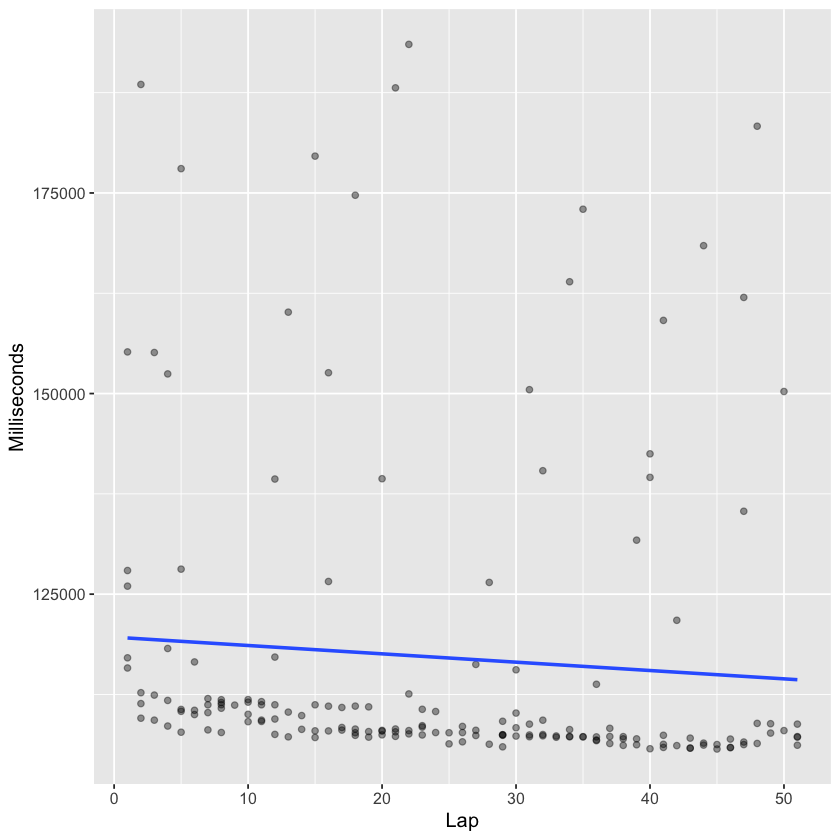

In [60]:
set.seed(2022)

#8. Azerbaijan

cs_azerbaijan <- sai_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

cs_azerbaijan_clean <- cs_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_azerbaijan_clean
cs_azerbaijan_clean_ID <- cs_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_azerbaijan_races <- sai_laps %>%
                    filter(raceId %in% cs_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(cs_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse()

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
932,69
954,69
1016,69
995,67


`geom_smooth()` using formula 'y ~ x'



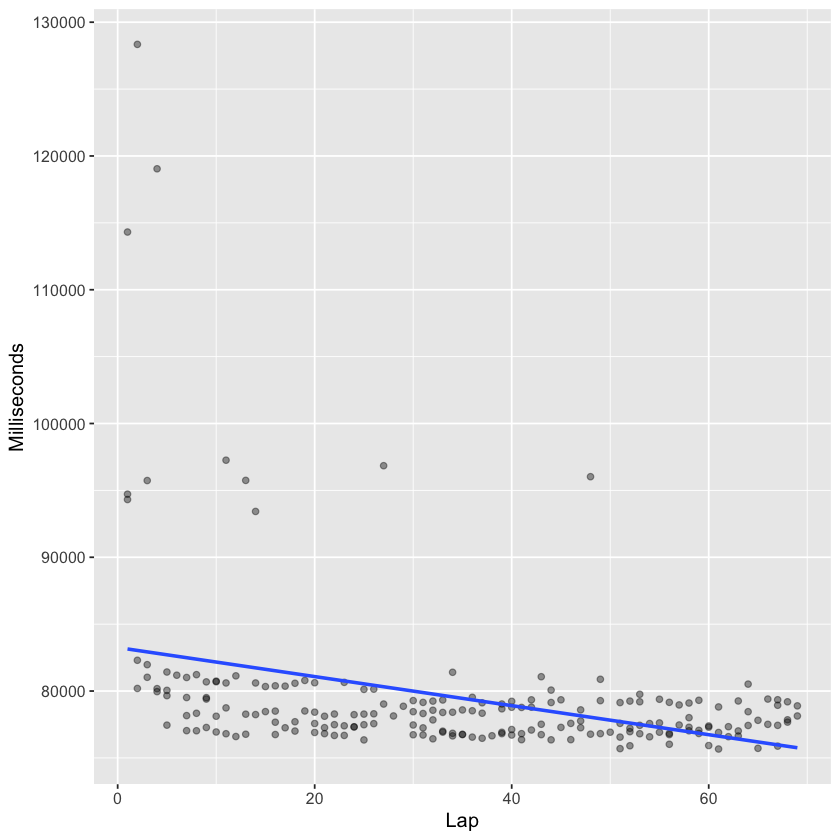

In [61]:
set.seed(2022)

#9. Canada

cs_canada <- sai_laps %>%
                filter(raceId %in% canada_race_ID) 

cs_canada_clean <- cs_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_canada_clean
cs_canada_clean_ID <- cs_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_canada_races <- sai_laps %>%
                    filter(raceId %in% cs_canada_clean_ID)

formulaone_split <- initial_split(cs_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse()

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



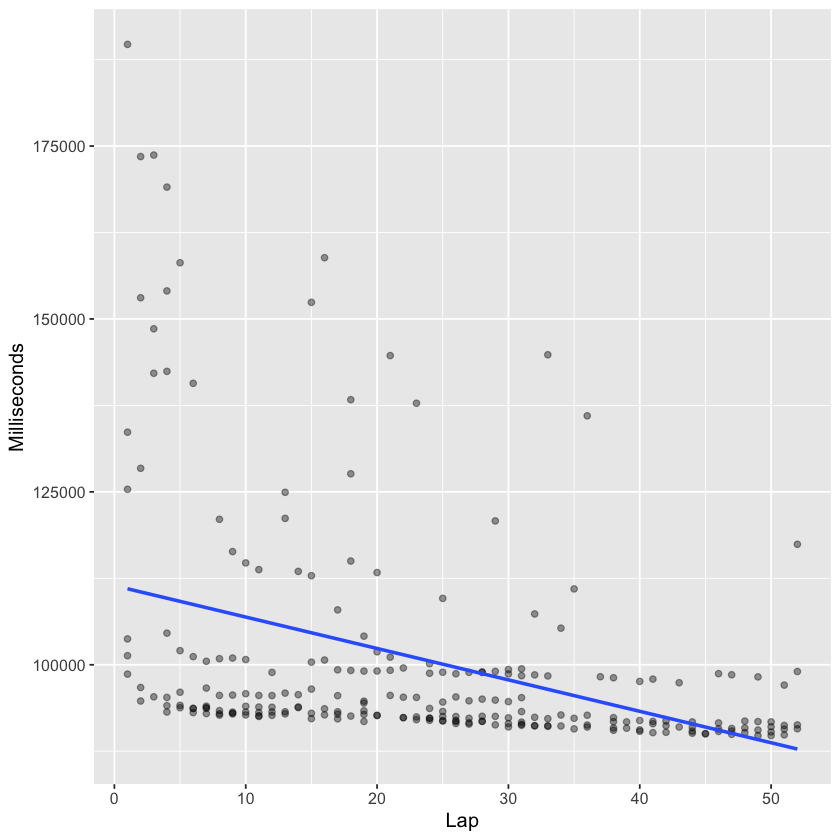

In [62]:
set.seed(2022)

#10. Great Britain

cs_uk <- sai_laps %>%
                filter(raceId %in% uk_race_ID) 

cs_uk_clean <- cs_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_uk_clean_ID <- cs_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_uk_races <- sai_laps %>%
                    filter(raceId %in% cs_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse()

### GETS PREDICTION

get_uk_prediction()

`geom_smooth()` using formula 'y ~ x'



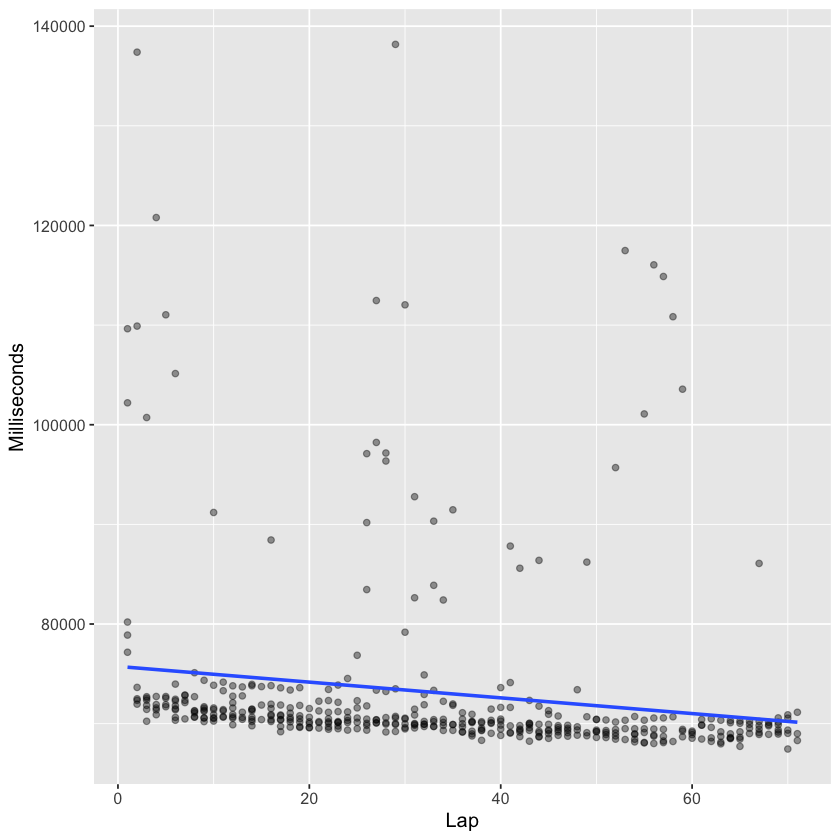

In [63]:
set.seed(2022)

#11. Austria

cs_austria <- sai_laps %>%
                filter(raceId %in% austria_race_ID) 

cs_austria_clean <- cs_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_austria_clean_ID <- cs_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_austria_races <- sai_laps %>%
                    filter(raceId %in% cs_austria_clean_ID)

formulaone_split <- initial_split(cs_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse()

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
996,53
1017,53
1059,53


`geom_smooth()` using formula 'y ~ x'



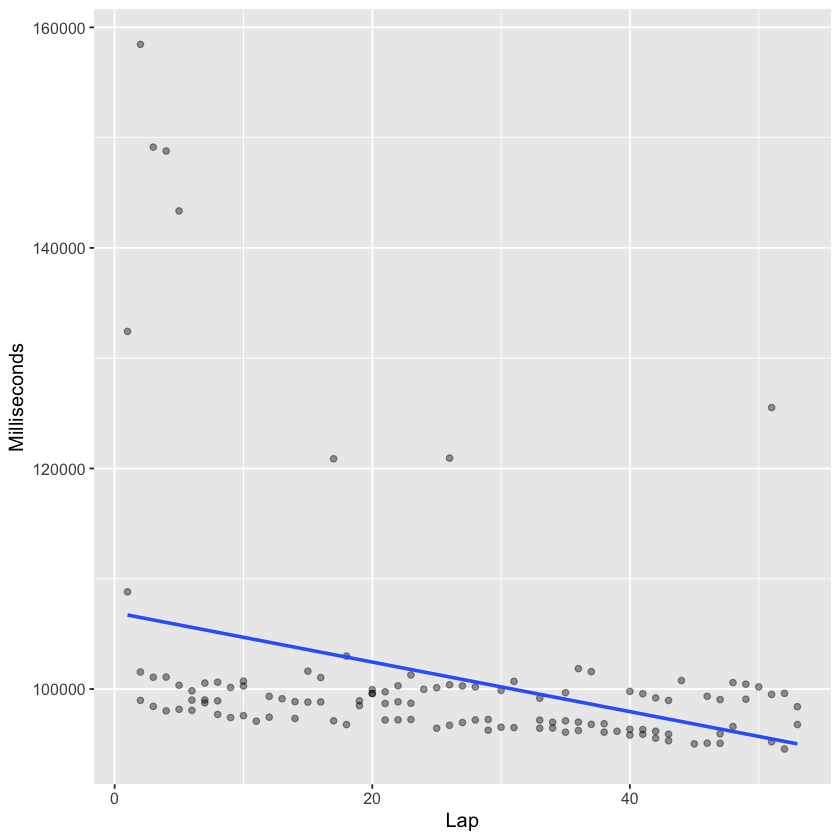

In [64]:
set.seed(2022)

#12. France

cs_france <- sai_laps %>%
                filter(raceId %in% france_race_ID) 

cs_france_clean <- cs_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_france_clean
cs_france_clean_ID <- cs_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_france_races <- sai_laps %>%
                    filter(raceId %in% cs_france_clean_ID)

formulaone_split <- initial_split(cs_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse()

### GETS PREDICTION

get_france_prediction()

`geom_smooth()` using formula 'y ~ x'



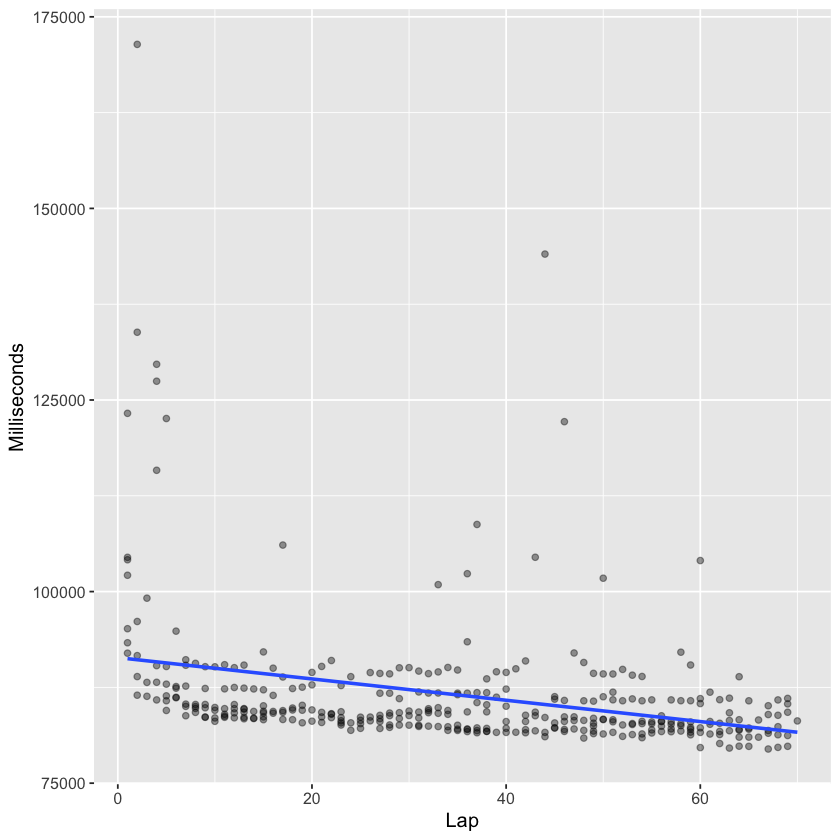

In [65]:
set.seed(2022)

#13. Hungary

cs_hungary <- sai_laps %>%
                filter(raceId %in% hungary_race_ID) 

cs_hungary_clean <- cs_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

cs_hungary_clean_ID <- cs_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_hungary_races <- sai_laps %>%
                    filter(raceId %in% cs_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse()

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
980,44
1001,43
937,32
960,1
1022,1
1063,1


`geom_smooth()` using formula 'y ~ x'



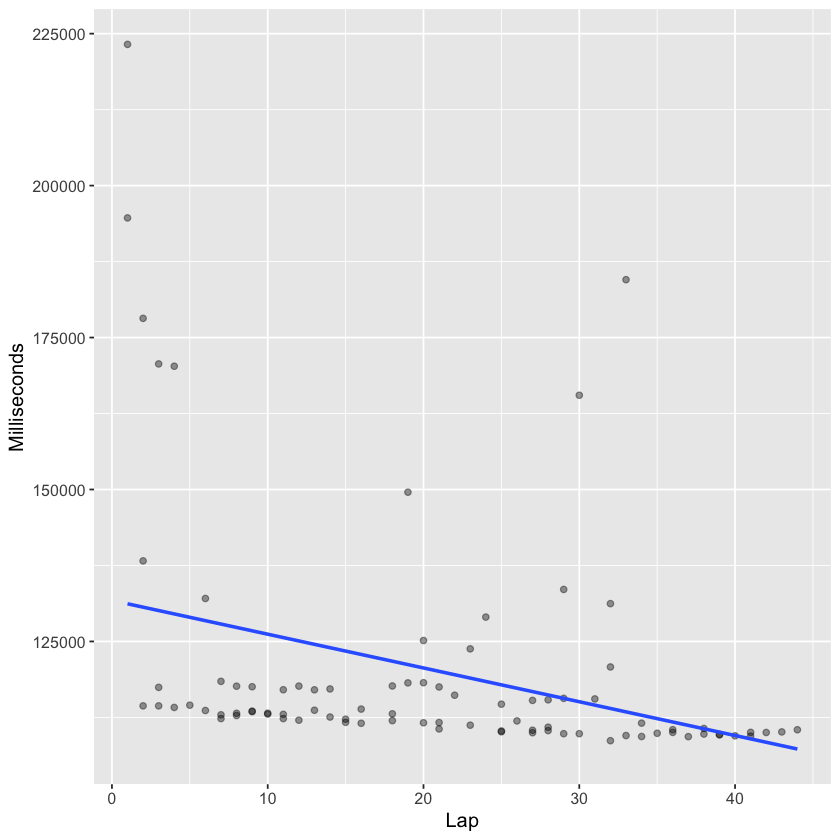

In [66]:
set.seed(2022)

#14. Belgium

cs_belgium <- sai_laps %>%
                filter(raceId %in% belgium_race_ID) 

cs_belgium_clean <- cs_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_belgium_clean
cs_belgium_clean_ID <- cs_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_belgium_races <- sai_laps %>%
                    filter(raceId %in% cs_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse()

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,71


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



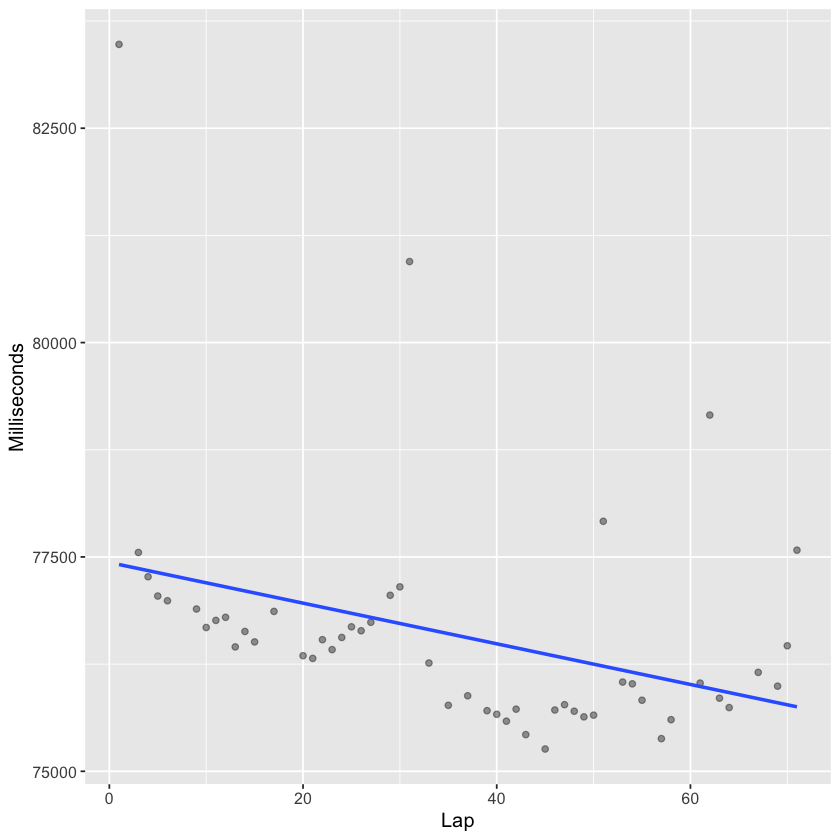

In [67]:
set.seed(2022)

#15. Netherlands

cs_netherlands <- sai_laps %>%
                filter(raceId %in% netherlands_race_ID) 

cs_netherlands_clean <- cs_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_netherlands_clean
cs_netherlands_clean_ID <- cs_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_netherlands_races <- sai_laps %>%
                    filter(raceId %in% cs_netherlands_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse()

### GETS PREDICTION

get_netherlands_prediction()

`geom_smooth()` using formula 'y ~ x'



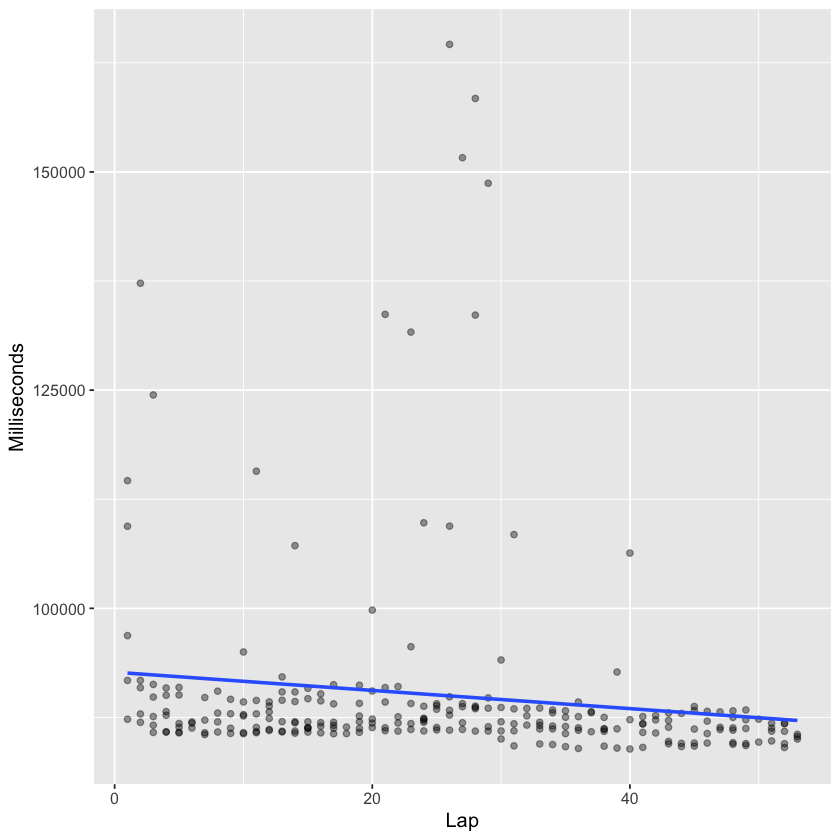

In [68]:
set.seed(2022)

#16. Italy, Monza

cs_monza <- sai_laps %>%
                filter(raceId %in% monza_race_ID) 

cs_monza_clean <- cs_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

cs_monza_clean_ID <- cs_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_monza_races <- sai_laps %>%
                    filter(raceId %in% cs_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(cs_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse()

### GETS PREDICTION

get_monza_prediction()

`geom_smooth()` using formula 'y ~ x'



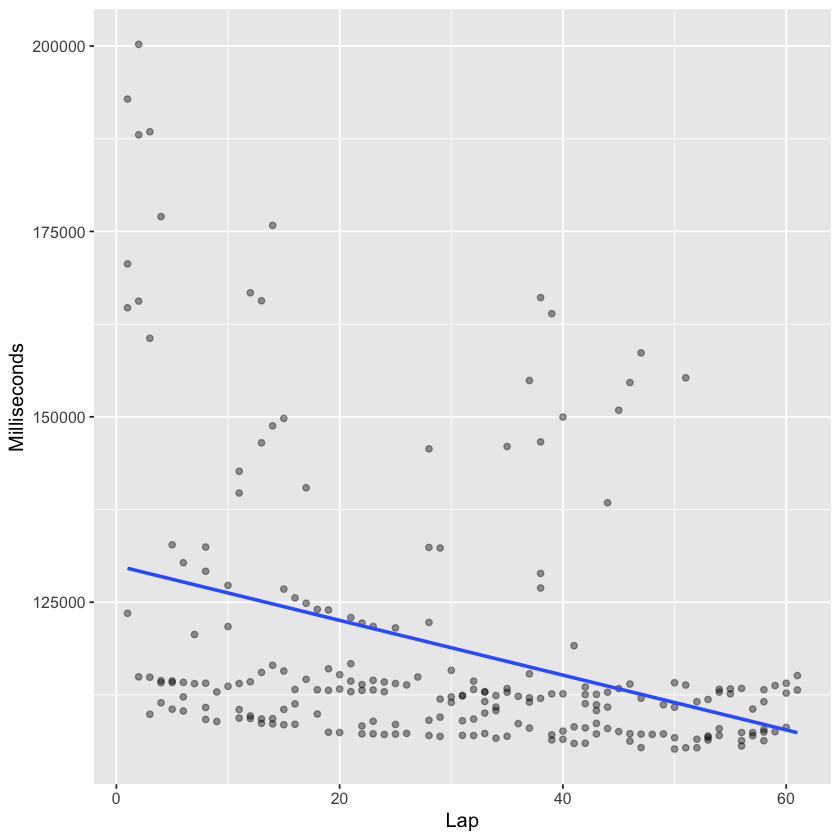

In [69]:
set.seed(2022)

#17. Singapore

cs_singapore <- sai_laps %>%
                filter(raceId %in% singapore_race_ID) 

cs_singapore_clean <- cs_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_singapore_clean_ID <- cs_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_singapore_races <- sai_laps %>%
                    filter(raceId %in% cs_singapore_clean_ID)

formulaone_split <- initial_split(cs_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse()

### GETS PREDICTION

get_singapore_prediction()

`geom_smooth()` using formula 'y ~ x'



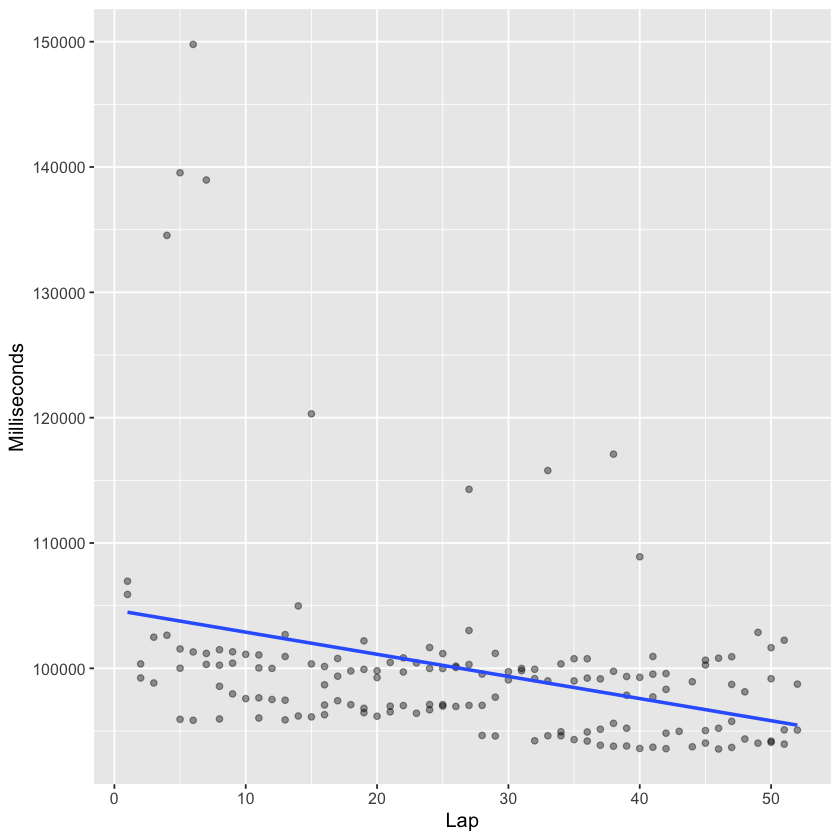

In [70]:
set.seed(2022)

#18. Japan

cs_japan <- sai_laps %>%
                filter(raceId %in% japan_race_ID) 

cs_japan_clean <- cs_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_japan_clean_ID <- cs_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_japan_races <- sai_laps %>%
                    filter(raceId %in% cs_japan_clean_ID)

formulaone_split <- initial_split(cs_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 18

initiate_rmse()

### GETS PREDICTION

get_japan_prediction()

`geom_smooth()` using formula 'y ~ x'



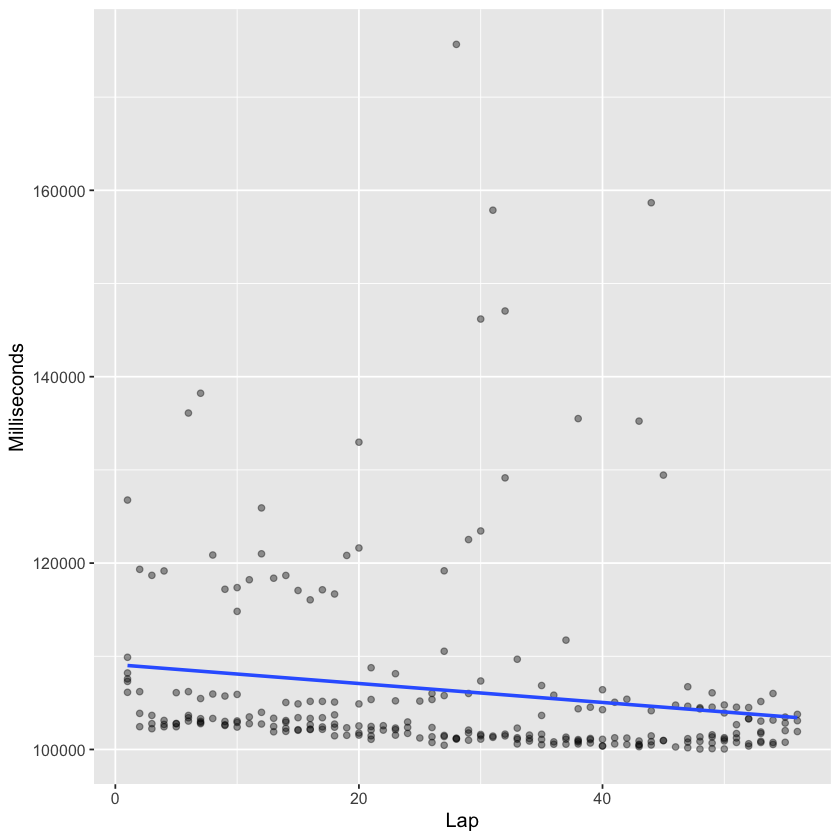

In [71]:
set.seed(2022)

#19. USA, Austin

cs_austin <- sai_laps %>%
                filter(raceId %in% austin_race_ID) 

cs_austin_clean <- cs_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_austin_clean_ID <- cs_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_austin_races <- sai_laps %>%
                    filter(raceId %in% cs_austin_clean_ID)

formulaone_split <- initial_split(cs_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse()

### GETS PREDICTION

get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



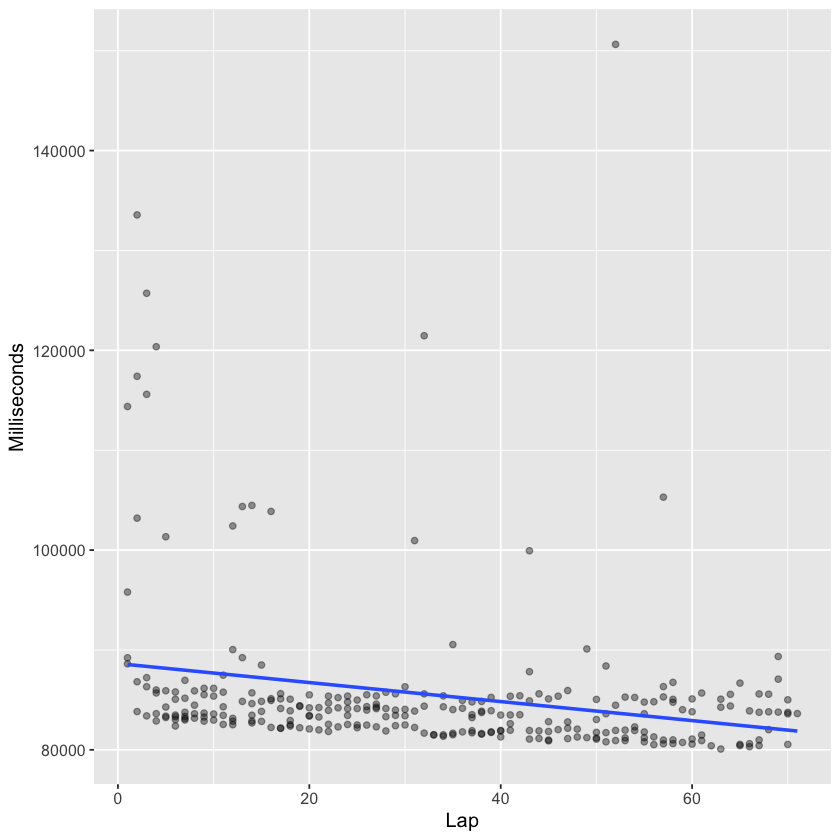

In [72]:
set.seed(2022)

#20. Mexico

cs_mexico <- sai_laps %>%
                filter(raceId %in% mexico_race_ID) 

cs_mexico_clean <- cs_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_mexico_clean_ID <- cs_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_mexico_races <- sai_laps %>%
                    filter(raceId %in% cs_mexico_clean_ID)

formulaone_split <- initial_split(cs_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse()

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



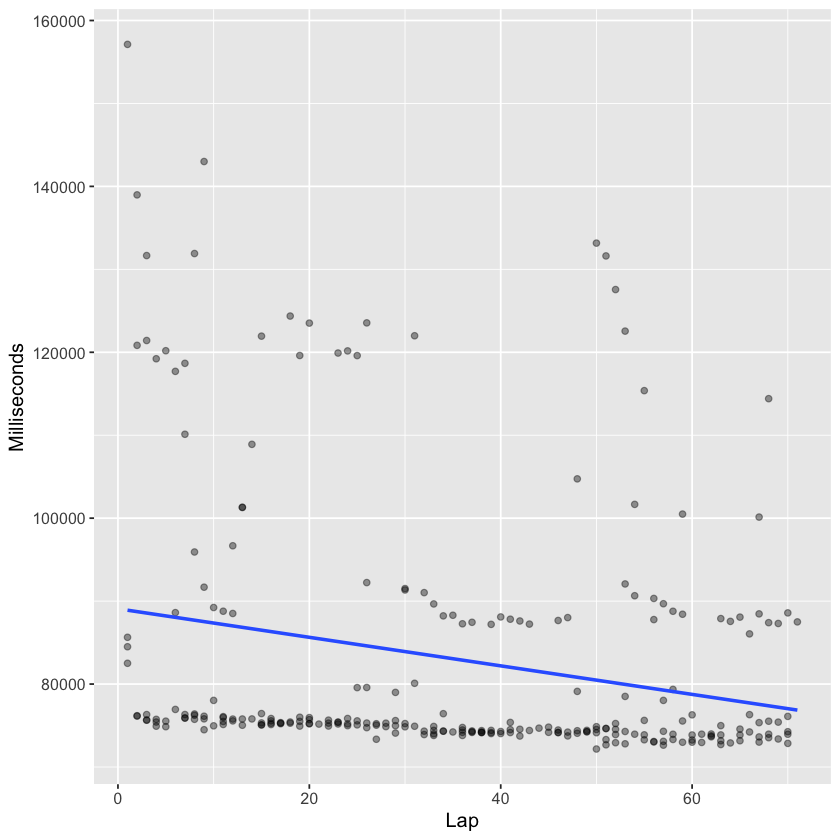

In [73]:
set.seed(2022)

#21. Brazil

cs_brazil <- sai_laps %>%
                filter(raceId %in% brazil_race_ID) 

cs_brazil_clean <- cs_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

cs_brazil_clean_ID <- cs_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_brazil_races <- sai_laps %>%
                    filter(raceId %in% cs_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(cs_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse()

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
945,55
1009,55
1047,55
1030,54
968,41
988,31


`geom_smooth()` using formula 'y ~ x'



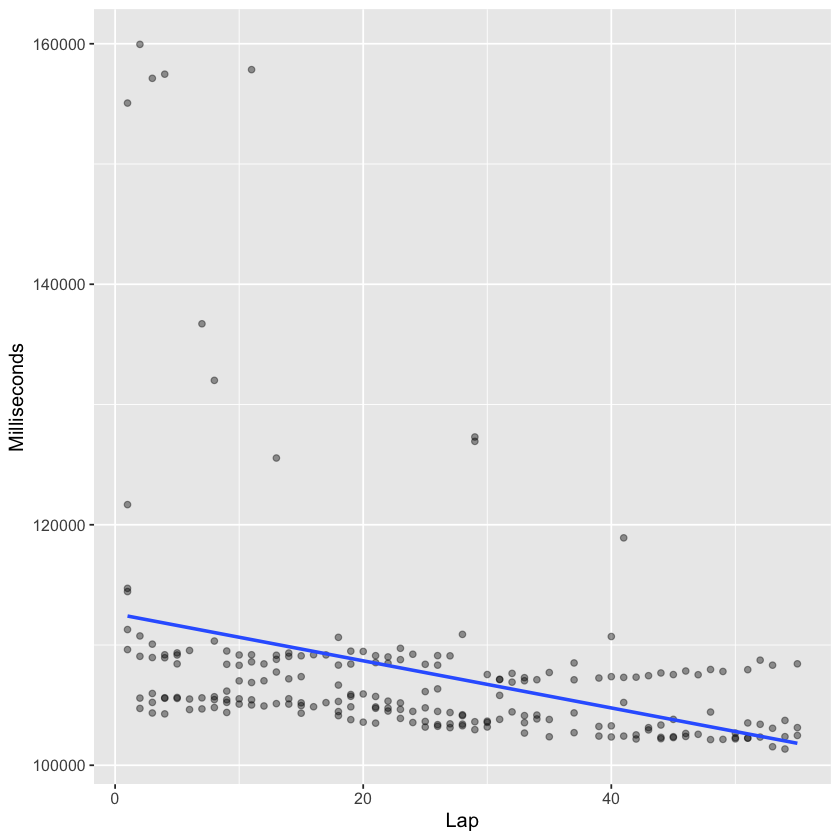

In [74]:
set.seed(2022)

#22. Abu Dhabi

cs_uae <- sai_laps %>%
                filter(raceId %in% uae_race_ID) 

cs_uae_clean <- cs_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
cs_uae_clean
cs_uae_clean_ID <- cs_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

cs_uae_races <- sai_laps %>%
                    filter(raceId %in% cs_uae_clean_ID)

formulaone_split <- initial_split(cs_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse()

### GETS PREDICTION

get_uae_prediction()

## Collection

In [75]:
rmse_col
racetime_col

#write_csv(rmse_col, "cs_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,6972.0044,1
rmse,standard,3052.7784,2
rmse,standard,6606.5495,3
rmse,standard,10956.9066,4
rmse,standard,8209.7287,5
rmse,standard,8732.8199,6
rmse,standard,10903.2481,7
rmse,standard,17422.8723,8
rmse,standard,5595.9817,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5746828,95.78046,1.596341,1
5606140,93.43567,1.557261,2
5467613,91.12689,1.518781,3
5597254,93.28757,1.554793,4
5730573,95.50956,1.591826,5
5898360,98.30600,1.638433,6
6425048,107.08413,1.784736,7
5963916,99.39860,1.656643,8
5557858,92.63096,1.543849,9
